# PseudoCode
* Lets figure out how PCA works
* Lets see if we can easily plot it
* Lets generate a fake, simulated dataset



In [1]:
import numpy as np
testDict = {'a':[1,2,3], 'b':[45,10,11], 'c':[1,4,15]}
testArray = np.array( list(testDict.values()))
print(testArray)

[[ 1  2  3]
 [45 10 11]
 [ 1  4 15]]


In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(testArray)

PCA(n_components=2)

In [3]:
PCAdata = pca.components_
PCAdata

array([[ 0.98629249,  0.15759031,  0.04891232],
       [-0.07333995,  0.15313457,  0.98548011]])

# Explaination of PCA
I think every row that gets output is the component with the most significant impact. Because I chose "n_components = 2", we are getting only two rows. These are now my axes, so if I were to plot this, the stuff in the first row would be my x-coor, and the stuff in my second row would be my y-coor. I can easily plot this by passing this to a plt.scatter function, and theoretically this just gives me a nice plot with points :))) The documentation also talks about getting the variance contained in each component, which I think will be useful for the complete design

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

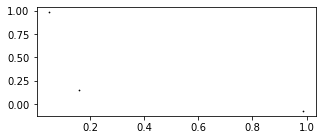

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mplpatches
import argparse

def plotMyPCA(pcaInput):
    figureWidth=5
    figureHeight=2
    plt.figure(figsize=(figureWidth,figureHeight))
    
    xData = pcaInput[0]
    yData = pcaInput[1]
    
    plt.scatter(xData,yData,marker='o',
    s=3, c=[(0,0,0)], linewidth=0)

plotMyPCA(PCAdata)


In [5]:
#####################################################################################################

In [6]:
# Fake simulated dataset time

# This block creates the tetramerDictionary (I know it kinda inefficient, sue me)
legalBases = ['A','C','G','T']
tetramerDic = {}

for base in legalBases:
    tetramer = base
    for base2 in legalBases:
        tetramer += base2
        for base3 in legalBases:
            tetramer += base3
            for base4 in legalBases:
                tetramer += base4
                tetramerDic[tetramer] = []
                tetramer = tetramer[:-1]
            tetramer = tetramer[:-1]
        tetramer = tetramer[:-1]
    tetramer = ''
len(tetramerDic.keys())

256

In [7]:
print(tetramerDic.keys())

dict_keys(['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT', 'ACGA', 'ACGC', 'ACGG', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT

In [133]:
# Making the randomizer maker lelel
group1Means = np.random.dirichlet(np.ones(256),size=1)[0] ; group1Means = {key:group1Means[i] for i,key in enumerate(tetramerDic.keys())}
group2Means = np.random.dirichlet(np.ones(256),size=1)[0] ; group2Means = {key:group2Means[i] for i,key in enumerate(tetramerDic.keys())}

group1SD = np.random.dirichlet(np.ones(256),size=1)[0]    ; group1SD = {key:group1SD[i] for i,key in enumerate(tetramerDic.keys())}
group2SD = np.random.dirichlet(np.ones(256), size=1)[0]   ; group2SD = {key:group2SD[i] for i,key in enumerate(tetramerDic.keys())}

In [134]:
def cleanList(inputList):
    list1 = inputList
    for item in list1:
        if item < 0:
            list1[ list(list1).index(item) ] = 0
        elif item > 1:
            list1[ list(list1).index(item) ] = 1
    return list(list1)


In [135]:
for tetramer in tetramerDic.keys():
    list1 = cleanList( np.random.normal(group1Means[tetramer], group1SD[tetramer], 70) )
    list2 = cleanList( np.random.normal(group2Means[tetramer], group2SD[tetramer], 30) )
    
    tetramerDic[tetramer] = list1+list2

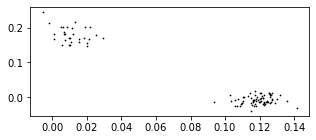

In [136]:
# Okay now that we have our tetramer data dictionary, lets PCA it!
tetramerArray = np.array( list(tetramerDic.values()))
pca = PCA(n_components=2)
pca.fit(tetramerArray)
PCAdata = pca.components_
plotMyPCA(PCAdata)

In [145]:
####################################################################
###########################################################################
# Following the PCA tutorial
import pandas as pd 
tetramerDF = pd.DataFrame(tetramerDic)
groups = 70*['group1'] + 30*['group2']
groups = pd.DataFrame(groups, columns = ['group'])
unstandDf = pd.concat([tetramerDF, groups], axis = 1)

In [146]:
unstandDf.head()

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,group
0,0.002410,0.006968,0.000000,0.002757,0.003445,0.000823,0.004256,0.017841,0.000000,0.005660,...,0.007340,0.002100,0.002445,0.000000,0.006949,0.001663,0.003540,0.009678,0.007592,group1
1,0.001967,0.003545,0.000000,0.004724,0.000553,0.000712,0.004051,0.019946,0.014272,0.005381,...,0.006116,0.002257,0.002380,0.004795,0.000000,0.000000,0.000000,0.008093,0.001336,group1
2,0.001655,0.004552,0.000190,0.004037,0.000000,0.000009,0.004031,0.021914,0.006809,0.005745,...,0.007420,0.002809,0.002742,0.000000,0.000000,0.003577,0.000000,0.010204,0.000000,group1
3,0.002066,0.004426,0.002105,0.001141,0.006670,0.001068,0.004377,0.017778,0.010238,0.005688,...,0.000127,0.000000,0.002711,0.000000,0.000000,0.000000,0.004757,0.005694,0.012025,group1
4,0.002983,0.007689,0.000000,0.004637,0.002755,0.000825,0.004147,0.018496,0.008980,0.005659,...,0.000000,0.000000,0.002718,0.007065,0.012994,0.006468,0.000000,0.013814,0.011278,group1


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [125]:
tetramerDF = pd.read_csv('tetraFrequency.csv')
tetramerDF.head()

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0.000457,0.000678,0.001040,0.000858,0.000586,0.000449,0.000494,0.001131,0.000517,0.000769,...,0.000736,0.001098,0.001134,0.000438,0.000657,0.000467,0.000791,0.000826,0.000894,0.000888
1,0.001288,0.000904,0.000866,0.000515,0.000586,0.001049,0.000905,0.001044,0.001034,0.000769,...,0.000368,0.000784,0.000670,0.000384,0.000493,0.001012,0.000528,0.000590,0.000752,0.000363
2,0.000332,0.000565,0.000635,0.000343,0.000512,0.000824,0.000494,0.000435,0.001182,0.000769,...,0.000460,0.000784,0.000567,0.000603,0.000438,0.000467,0.000330,0.000590,0.000329,0.000323
3,0.000665,0.000565,0.000693,0.000629,0.000952,0.000599,0.000494,0.000609,0.000813,0.000604,...,0.000184,0.000549,0.000825,0.000055,0.000767,0.000467,0.000725,0.000531,0.000329,0.000808
4,0.000748,0.000904,0.000751,0.000687,0.000659,0.000824,0.000987,0.000522,0.001108,0.000714,...,0.000552,0.000549,0.000980,0.000603,0.000712,0.000467,0.000264,0.000590,0.000847,0.000606


In [126]:
features = tetramerDF.columns
x = tetramerDF.loc[:, features].values

In [127]:
x = StandardScaler().fit_transform(x)

In [128]:
pd.DataFrame(data=x, columns=features).head()

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,-0.673560,-0.015127,1.371393,0.650136,-0.336981,-0.903905,-0.721492,1.592788,-0.462980,0.364265,...,0.189121,1.285490,2.127474,-1.044957,-0.098739,-0.729649,0.366506,0.523440,0.986093,0.633774
1,1.821798,0.960952,0.708500,-0.609798,-0.336981,1.433786,0.860274,1.284642,0.995507,0.364265,...,-1.084407,0.317623,-0.051286,-1.280812,-0.780314,1.126261,-0.511554,-0.327748,0.330979,-0.972673
2,-1.047863,-0.503166,-0.175356,-1.239765,-0.595304,0.557152,-0.721492,-0.872381,1.412217,0.364265,...,-0.766025,0.317623,-0.535455,-0.337394,-1.007506,-0.729649,-1.170098,-0.327748,-1.634365,-1.096246
3,-0.049720,-0.503166,0.045608,-0.189820,0.954633,-0.319482,-0.721492,-0.256089,0.370441,-0.322181,...,-1.721171,-0.408278,0.674967,-2.695938,0.355645,-0.729649,0.146991,-0.540545,-1.634365,0.386628
4,0.199816,0.960952,0.266572,0.020169,-0.078658,0.557152,1.176627,-0.564235,1.203862,0.135450,...,-0.447643,-0.408278,1.401220,-0.337394,0.128453,-0.729649,-1.389613,-0.327748,0.767722,-0.231236


In [129]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [130]:
principalDf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2'])

In [131]:
principalDf.head()

,pc1,pc2
0,2.465220,1.249726
1,-0.197430,1.028781
2,-2.831509,4.601236
3,2.272447,2.246411
4,-2.378367,4.537644


In [132]:
unstandDf['group'].head()

NameError: name 'unstandDf' is not defined

In [133]:
#finalDf = pd.concat([principalDf, unstandDf['group']], axis=1)
finalDf = principalDf

In [134]:
finalDf.head()

,pc1,pc2
0,2.465220,1.249726
1,-0.197430,1.028781
2,-2.831509,4.601236
3,2.272447,2.246411
4,-2.378367,4.537644


KeyError: 'group'

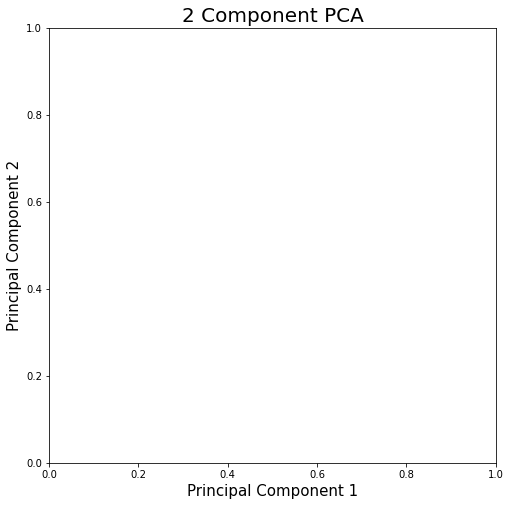

In [23]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['group1', 'group2']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

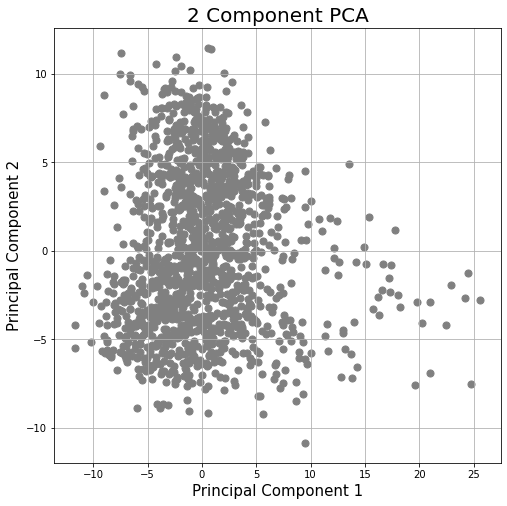

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(finalDf['pc1']
               , finalDf['pc2']
               , c = 'grey'
               , s = 50)
#ax.legend(targets)
ax.grid()

In [167]:
# on command line write
#     pip install pandas

# Write this and give it your dictionary (hope the shape is as expected)
import pandas as pd
tetramerDic = #Your dictionary of lists
# should be shaped like
#     {'AAAA':[num,num,num...], 
#      'AAAT':[num,num,num...], ... }

df = pd.DataFrame(data=tetramerDic)
df.to_csv('give_to_matthew_plz.csv',index=False)

In [166]:
df

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0.002410,0.006968,0.000000,0.002757,0.003445,0.000823,0.004256,0.017841,0.000000,0.005660,...,0.000000,0.007340,0.002100,0.002445,0.000000,0.006949,0.001663,0.003540,0.009678,0.007592
1,0.001967,0.003545,0.000000,0.004724,0.000553,0.000712,0.004051,0.019946,0.014272,0.005381,...,0.005501,0.006116,0.002257,0.002380,0.004795,0.000000,0.000000,0.000000,0.008093,0.001336
2,0.001655,0.004552,0.000190,0.004037,0.000000,0.000009,0.004031,0.021914,0.006809,0.005745,...,0.000000,0.007420,0.002809,0.002742,0.000000,0.000000,0.003577,0.000000,0.010204,0.000000
3,0.002066,0.004426,0.002105,0.001141,0.006670,0.001068,0.004377,0.017778,0.010238,0.005688,...,0.029487,0.000127,0.000000,0.002711,0.000000,0.000000,0.000000,0.004757,0.005694,0.012025
4,0.002983,0.007689,0.000000,0.004637,0.002755,0.000825,0.004147,0.018496,0.008980,0.005659,...,0.007768,0.000000,0.000000,0.002718,0.007065,0.012994,0.006468,0.000000,0.013814,0.011278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.004063,0.000543,0.010115,0.023998,0.002863,0.001891,0.001292,0.001228,...,0.005749,0.002208,0.000000,0.004879,0.005377,0.000000,0.004674,0.000000,0.004644,0.012041
96,0.015335,0.002549,0.000003,0.000518,0.009569,0.008152,0.002766,0.001453,0.002369,0.003123,...,0.006707,0.006357,0.000000,0.004592,0.006821,0.000000,0.000000,0.008337,0.000181,0.011616
97,0.002625,0.004093,0.004195,0.000668,0.014785,0.000000,0.002962,0.001812,0.001361,0.002838,...,0.000000,0.004448,0.005112,0.000000,0.004093,0.007001,0.005362,0.003611,0.000730,0.012413
98,0.001942,0.011997,0.003898,0.000553,0.006963,0.000158,0.003033,0.001837,0.001037,0.001372,...,0.029420,0.002639,0.006413,0.009874,0.009806,0.000000,0.010720,0.000000,0.000000,0.011462


In [29]:
# Working with the Matthew Data for real

In [63]:
# I kind of want to color the fragments as a rainbow from beginning to end to see if any pieces are colored similarly
red = [x/255 for x in [255,0,0]]
orange = [x/255 for x in [245,182,66]]
yellow = [x/255 for x in [245,236,66]]
green = [x/255 for x in [66,245,84]]
blue = [x/255 for x in [66,69,245]]
violet = [x/255 for x in [245,66,242]]

colors = [red,orange,yellow,green,blue,violet]
transLen = int(finalDf.shape[0]/5)
transMatrix = []

for n in range(0,len(colors)-1):
    color1 = colors[n]
    color2 = colors[n+1]
    print(color1, color2)
    R = [x for x in np.linspace(color1[0], color2[0], transLen)]
    G = [x for x in np.linspace(color1[1], color2[1], transLen)]
    B = [x for x in np.linspace(color1[2], color2[2], transLen)]
    
    for x in zip(R,G,B):
        transMatrix.append(x)
while len(transMatrix) < finalDf.shape[0]:
    transMatrix.append([0,0,0])
    

[1.0, 0.0, 0.0] [0.9607843137254902, 0.7137254901960784, 0.25882352941176473]
[0.9607843137254902, 0.7137254901960784, 0.25882352941176473] [0.9607843137254902, 0.9254901960784314, 0.25882352941176473]
[0.9607843137254902, 0.9254901960784314, 0.25882352941176473] [0.25882352941176473, 0.9607843137254902, 0.32941176470588235]
[0.25882352941176473, 0.9607843137254902, 0.32941176470588235] [0.25882352941176473, 0.27058823529411763, 0.9607843137254902]
[0.25882352941176473, 0.27058823529411763, 0.9607843137254902] [0.9607843137254902, 0.25882352941176473, 0.9490196078431372]


In [64]:
color = pd.Series(transMatrix, name='color')
finalDf = pd.concat([principalDf, color], axis=1)
finalDf.head()

,pc1,pc2,color
0,2.465221,1.249727,"(1.0, 0.0, 0.0)"
1,-0.197430,1.028783,"(0.9998656997045393, 0.0024442653773838305, 0...."
2,-2.831510,4.601235,"(0.9997313994090787, 0.004888530754767661, 0.0..."
3,2.272448,2.246408,"(0.999597099113618, 0.007332796132151492, 0.00..."
4,-2.378368,4.537644,"(0.9994627988181574, 0.009777061509535322, 0.0..."


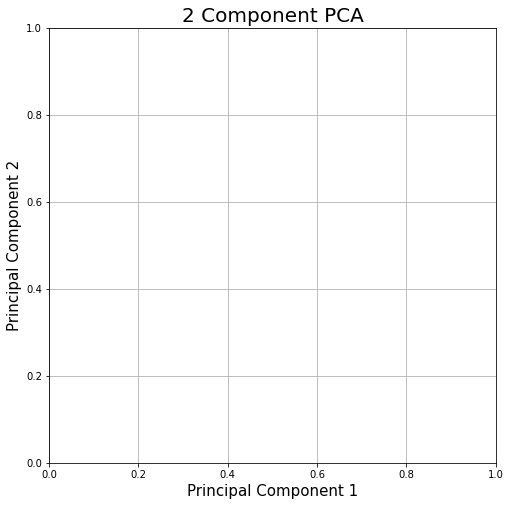

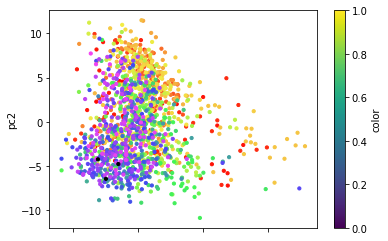

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

finalDf.plot.scatter(x='pc1'
               , y='pc2'
               , c = 'color'
               , s = 10)
#ax.legend(targets)
ax.grid()

In [73]:
pca.explained_variance_ratio_

array([0.09218538, 0.0778975 ])

In [79]:
for color in finalDf.values:
    print(color, '\n')
    

[2.4652208130955406 1.2497265428536102 (1.0, 0.0, 0.0)] 

[-0.1974303397928557 1.0287832043495724
 (0.9998656997045393, 0.0024442653773838305, 0.0008863819500402901)] 

[-2.831509667246983 4.601234797979482
 (0.9997313994090787, 0.004888530754767661, 0.0017727639000805803)] 

[2.2724476032662326 2.246407906462441
 (0.999597099113618, 0.007332796132151492, 0.0026591458501208703)] 

[-2.378368032363736 4.537643563999223
 (0.9994627988181574, 0.009777061509535322, 0.0035455278001611606)] 

[2.8646332828894456 4.6920430442010606
 (0.9993284985226968, 0.012221326886919152, 0.004431909750201451)] 

[6.073621343718839 4.221108641367134
 (0.9991941982272361, 0.014665592264302984, 0.005318291700241741)] 

[0.43026664009239785 7.119813803377486
 (0.9990598979317754, 0.017109857641686814, 0.006204673650282031)] 

[2.3394129061446876 6.03628993192135
 (0.9989255976363148, 0.019554123019070644, 0.007091055600322321)] 

[0.9873813570783888 8.14734055077317
 (0.9987912973408541, 0.021998388396454474,

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
inFile = 'tetraFrequency.csv'
outFile = 'deino_radio_r1_PCA.png'#'hodg_cicad_PCA.png'#'vibrio_cholera_PCA.png'
chunkSize = 1000
n_components = 10

####
# Which PCA to plot
x_axis_pca = 1
y_axis_pca = 4

####
# Which points to highlight
left_coor= 1400
right_coor= 1410

# coor around 53,200 in hodgkinia looks like HGTC

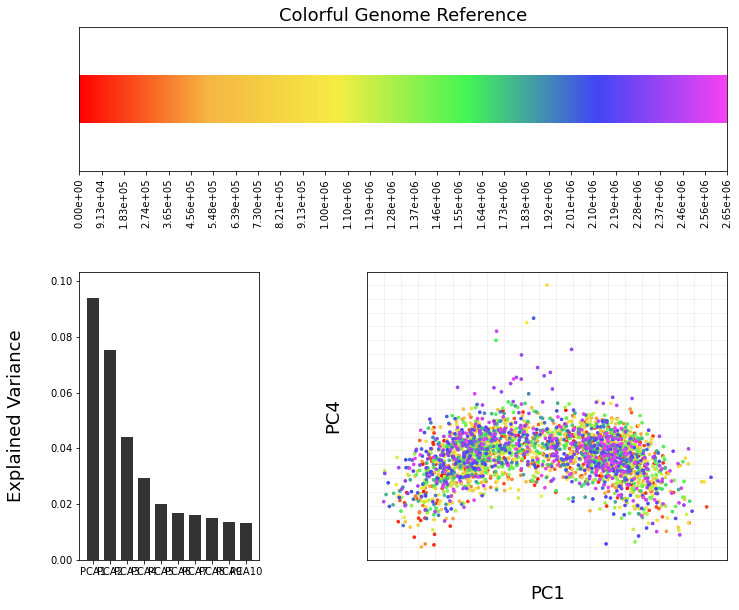

In [13]:
figureWidth = 10
figureHeight = 12

plt.figure(figsize=(figureWidth, figureHeight))

##############
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Data Panel
##############
dataPanelHeight = 4 ; relativedataPanelHeight = dataPanelHeight/figureHeight
dataPanelWidth = 5 ; relativedataPanelWidth = dataPanelWidth/figureWidth


dataPanel = plt.axes([0.45, 0.05,relativedataPanelWidth,relativedataPanelHeight])
dataPanel.tick_params(bottom=False, labelbottom=False,
    left=False, labelleft=False,
    right=False, labelright=False,
    top=False, labeltop=False)

def curateData(tetramerDF, n=2):
    '''Given a dataframe of 256 dimensions, returns a df PCA of n dim and a pca for explainedVariance'''
    features = tetramerDF.columns
    x = tetramerDF.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=n)
    columnNames = []
    for column in range(0,n):
        columnNames.append(f'pc{column+1}')
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents, columns = columnNames)
    return principalDf, pca

tetramerDF = pd.read_csv(inFile) # should be a csv file of just tetranucleotide counts/freq (the standardization fixes any discrepency)
finalDF, pca = curateData(tetramerDF, n_components)

def makeRainbowList(finalDf, colors=None):
    '''Returns a list to make a rainbow'''
    red = [x/255 for x in [255,0,0]]
    orange = [x/255 for x in [245,182,66]]
    yellow = [x/255 for x in [245,236,66]]
    green = [x/255 for x in [66,245,84]]
    blue = [x/255 for x in [66,69,245]]
    violet = [x/255 for x in [245,66,242]]
    
    if colors:
        colors = colors
    else:
        colors = [red,orange,yellow,green,blue,violet]
    transLen = int(finalDf.shape[0]/(len(colors)-1))
    transMatrix = []

    for n in range(0,len(colors)-1):
        color1 = colors[n]
        color2 = colors[n+1]
        R = [x for x in np.linspace(color1[0], color2[0], transLen)]
        G = [x for x in np.linspace(color1[1], color2[1], transLen)]
        B = [x for x in np.linspace(color1[2], color2[2], transLen)]

        for x in zip(R,G,B):
            transMatrix.append(x)
    while len(transMatrix) < finalDf.shape[0]:
        transMatrix.append([0.5,0.5,0.5])
        
    return transMatrix

color = pd.Series(makeRainbowList(finalDF), name='color')
finalDF = pd.concat([finalDF, color], axis=1)

'''
for n, index in enumerate(finalDF.values):
    x = index[x_axis_pca-1]
    y = index[y_axis_pca-1]
    color = index[len(index)-1]
    if left_coor < n < right_coor:
        linewidth = 7
    else:
        linewidth = 0
    dataPanel.plot(x,y,marker='o',markerfacecolor=color,
        markeredgecolor='red', markersize=3, markeredgewidth=linewidth,
        linewidth=0)
'''
# I think scatter is faster? The stuff above does basically the same
# thing as this, but can also highlight certain points
x_pca_data = finalDF[f'pc{x_axis_pca}']
y_pca_data = finalDF[f'pc{y_axis_pca}']

dataPanel.scatter(x_pca_data,y_pca_data,c=finalDF['color'],s=7)

xmin = min(list(x_pca_data))
xmax = max(list(x_pca_data))
dataPanel.set_xticks([x for x in np.linspace(xmin,xmax,20)])

ymin = min(list(y_pca_data))
ymax = max(list(y_pca_data))
dataPanel.set_yticks([y for y in np.linspace(ymin,ymax,20)])

dataPanel.set_xlabel(f'\nPC{x_axis_pca}', fontsize=18)
dataPanel.set_ylabel(f'PC{y_axis_pca}\n', fontsize=18)
dataPanel.grid(color='grey', linestyle='-', linewidth=1, alpha=0.1)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Variance Panel
##############
varPanelHeight = 4 ; relativeVarPanelHeight = varPanelHeight/figureHeight
varPanelWidth = 2.5 ; relativeVarPanelWidth = varPanelWidth/figureWidth


varPanel = plt.axes([0.05, 0.05,relativeVarPanelWidth,relativeVarPanelHeight])

# pca.explaned_varaince_ratio_ gets plotted here
rectangleWidth = 0.7
centeringShift = 1-rectangleWidth/2
xTics = []
xTicLabels = []
for n, variance in enumerate(pca.explained_variance_ratio_):
    rectangle=mplpatches.Rectangle( [n+centeringShift,0],rectangleWidth,variance,
        facecolor=( 0.2,0.2,0.2 ),
        edgecolor='black',
        linewidth=0)
    varPanel.add_patch(rectangle)
    xTics.append(n+1)
    xTicLabels.append(f'PCA{n+1}')

varPanel.set_xlim(0.2,len(pca.explained_variance_ratio_)+0.8)
varPanel.set_ylim(0,max(pca.explained_variance_ratio_)*1.1)

varPanel.set_xticks(xTics)
varPanel.set_xticklabels(xTicLabels)

varPanel.set_ylabel('Explained Variance\n', fontsize=18)


##############
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Colorful Genome Panel
##############
genomePanelHeight = 2 ; relativegenomePanelHeight = genomePanelHeight/figureHeight
genomePanelWidth = 9 ; relativegenomePanelWidth = genomePanelWidth/figureWidth

genomePanel = plt.axes([0.05, 0.5,relativegenomePanelWidth,relativegenomePanelHeight])
genomePanel.tick_params(bottom=True, labelbottom=True,
    left=False, labelleft=False,
    right=False, labelright=False,
    top=False, labeltop=False)

n_chunk = finalDF.shape[0]
for i in range(0,n_chunk):
    left = i*chunkSize
    rectangleHeight = 1
    rectangleWidth = chunkSize
    color = finalDF['color'].iloc[i]
    rectangle=mplpatches.Rectangle([left,1],
                                   rectangleWidth,
                                   rectangleHeight,
                                   facecolor=color,
                                   edgecolor='black',
                                   linewidth=0)
    genomePanel.add_patch(rectangle)

genomePanel.set_ylim([0,3])
genomePanel.set_xlim([0,chunkSize*n_chunk])

xmin = 0
xmax = chunkSize*n_chunk
genomePanel.set_xticks([x for x in np.linspace(xmin,xmax,30)])
genomePanel.set_xticklabels(["{:.2e}".format( round(x,0) ) for x in np.linspace(xmin,xmax,30)], rotation=90)
genomePanel.set_title('Colorful Genome Reference', fontdict={'fontsize':18})

##############


plt.savefig(outFile, dpi=300)

In [326]:
print(chunkSize,n_chunk)

1000 2761


In [418]:
# Lets call this program HoG finder! (Horizontal Gene finder!)

In [ ]:
# Backup in case I fuck up
figureWidth = 10
figureHeight = 12

plt.figure(figsize=(figureWidth, figureHeight))

##############
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Data Panel
##############
dataPanelHeight = 4 ; relativedataPanelHeight = dataPanelHeight/figureHeight
dataPanelWidth = 5 ; relativedataPanelWidth = dataPanelWidth/figureWidth


dataPanel = plt.axes([0.45, 0.05,relativedataPanelWidth,relativedataPanelHeight])
dataPanel.tick_params(bottom=False, labelbottom=False,
    left=False, labelleft=False,
    right=False, labelright=False,
    top=False, labeltop=False)

def curateData(tetramerDF, n=2):
    '''Given a dataframe of 256 dimensions, returns a df PCA of n dim and a pca for explainedVariance'''
    features = tetramerDF.columns
    x = tetramerDF.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=n)
    columnNames = []
    for column in range(0,n):
        columnNames.append(f'pc{column+1}')
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents, columns = columnNames)
    return principalDf, pca

tetramerDF = pd.read_csv(inFile) # should be a csv file of just tetranucleotide counts/freq (the standardization fixes any discrepency)
finalDF, pca = curateData(tetramerDF, n_components)

def makeRainbowList(finalDf, colors=None):
    '''Returns a list to make a rainbow'''
    red = [x/255 for x in [255,0,0]]
    orange = [x/255 for x in [245,182,66]]
    yellow = [x/255 for x in [245,236,66]]
    green = [x/255 for x in [66,245,84]]
    blue = [x/255 for x in [66,69,245]]
    violet = [x/255 for x in [245,66,242]]
    
    if colors:
        colors = colors
    else:
        colors = [red,orange,yellow,green,blue,violet]
    transLen = int(finalDf.shape[0]/(len(colors)-1))
    transMatrix = []

    for n in range(0,len(colors)-1):
        color1 = colors[n]
        color2 = colors[n+1]
        R = [x for x in np.linspace(color1[0], color2[0], transLen)]
        G = [x for x in np.linspace(color1[1], color2[1], transLen)]
        B = [x for x in np.linspace(color1[2], color2[2], transLen)]

        for x in zip(R,G,B):
            transMatrix.append(x)
    while len(transMatrix) < finalDf.shape[0]:
        transMatrix.append([0.5,0.5,0.5])
        
    return transMatrix

color = pd.Series(makeRainbowList(finalDF), name='color')
finalDF = pd.concat([finalDF, color], axis=1)

for n, index in enumerate(finalDF.values):
    x = index[x_axis_pca-1]
    y = index[y_axis_pca-1]
    color = index[len(index)-1]
    if left_coor < n < right_coor:
        linewidth = 7
    else:
        linewidth = 0
    dataPanel.plot(x,y,marker='o',markerfacecolor=color,
        markeredgecolor='red', markersize=3, markeredgewidth=linewidth,
        linewidth=0)

xmin = min(list(finalDF['pc1']))
xmax = max(list(finalDF['pc1']))
dataPanel.set_xticks([x for x in np.linspace(xmin,xmax,20)])

ymin = min(list(finalDF['pc2']))
ymax = max(list(finalDF['pc2']))
dataPanel.set_yticks([y for y in np.linspace(ymin,ymax,20)])

dataPanel.set_xlabel('\nPC1', fontsize=18)
dataPanel.set_ylabel('PC2\n', fontsize=18)
dataPanel.grid(color='grey', linestyle='-', linewidth=1, alpha=0.1)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Variance Panel
##############
varPanelHeight = 4 ; relativeVarPanelHeight = varPanelHeight/figureHeight
varPanelWidth = 2.5 ; relativeVarPanelWidth = varPanelWidth/figureWidth


varPanel = plt.axes([0.05, 0.05,relativeVarPanelWidth,relativeVarPanelHeight])

# pca.explaned_varaince_ratio_ gets plotted here
rectangleWidth = 0.7
centeringShift = 1-rectangleWidth/2
xTics = []
xTicLabels = []
for n, variance in enumerate(pca.explained_variance_ratio_):
    rectangle=mplpatches.Rectangle( [n+centeringShift,0],rectangleWidth,variance,
        facecolor=( 0.2,0.2,0.2 ),
        edgecolor='black',
        linewidth=0)
    varPanel.add_patch(rectangle)
    xTics.append(n+1)
    xTicLabels.append(f'PCA{n+1}')

varPanel.set_xlim(0.2,len(pca.explained_variance_ratio_)+0.8)
varPanel.set_ylim(0,max(pca.explained_variance_ratio_)*1.1)

varPanel.set_xticks(xTics)
varPanel.set_xticklabels(xTicLabels)

varPanel.set_ylabel('Explained Variance\n', fontsize=18)


##############
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Colorful Genome Panel
##############
genomePanelHeight = 2 ; relativegenomePanelHeight = genomePanelHeight/figureHeight
genomePanelWidth = 9 ; relativegenomePanelWidth = genomePanelWidth/figureWidth

genomePanel = plt.axes([0.05, 0.5,relativegenomePanelWidth,relativegenomePanelHeight])
genomePanel.tick_params(bottom=True, labelbottom=True,
    left=False, labelleft=False,
    right=False, labelright=False,
    top=False, labeltop=False)

n_chunk = finalDF.shape[0]
for i in range(0,n_chunk):
    left = i*chunkSize
    rectangleHeight = 1
    rectangleWidth = chunkSize
    color = finalDF['color'].iloc[i]
    rectangle=mplpatches.Rectangle([left,1],
                                   rectangleWidth,
                                   rectangleHeight,
                                   facecolor=color,
                                   edgecolor='black',
                                   linewidth=0)
    genomePanel.add_patch(rectangle)

genomePanel.set_ylim([0,3])
genomePanel.set_xlim([0,chunkSize*n_chunk])

xmin = 0
xmax = chunkSize*n_chunk
genomePanel.set_xticks([x for x in np.linspace(xmin,xmax,30)])
genomePanel.set_xticklabels(["{:.2e}".format( round(x,0) ) for x in np.linspace(xmin,xmax,30)], rotation=90)
genomePanel.set_title('Colorful Genome Reference', fontdict={'fontsize':18})

##############


plt.savefig(outFile, dpi=300)